In [1]:
import tensorflow as tf
import tensorflow_io as tfio
from models.vqvae import *
from IPython import display

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import tensorflow_probability as tfp
import time
from loader import *

from IPython.display import Audio 
import librosa
import librosa.display

hparams = HParams(  
    # spectrogramming
    win_length = 2048,
    n_fft = 2048,
    hop_length= 256,
    ref_level_db = 50,
    min_level_db = -100,
    # mel scaling
    num_mel_bins = 256,
    mel_lower_edge_hertz = 0,
    mel_upper_edge_hertz = 10000,
    # inversion
    power = 1.5, # for spectral inversion
    griffin_lim_iters = 50,
    pad=True,
    #
)


/home/jerms/.pyenv/versions/3.8.12/lib/python3.8/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
train_dataset, test_dataset = get_training_set()

loading spectrogram
not shape
loading spectrogram
not shape


2021-09-30 15:49:53.691822: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-30 15:49:53.717969: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-30 15:49:53.718631: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-30 15:49:53.720189: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [4]:
vqvae_trainer = VQVAETrainer(latent_dim=128, num_embeddings=128)
vqvae_trainer.load_weights("/home/jerms/daniil/new_vae/saved_models/vqvae_run_128_128")
vqvae_trainer.compile(optimizer=keras.optimizers.Adam())

In [5]:
def get_predictions(model, epoch, test_samples):
    predictions = model.vqvae(test_samples)
    return predictions

In [6]:
for test_batch in test_dataset.take(1):
    test_good_sample = test_batch[0:16, :, :, :]

2021-09-30 15:50:57.352133: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [7]:
preds = get_predictions(vqvae_trainer, 10, test_good_sample)

2021-09-30 15:50:59.641175: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8100


In [81]:
audio_index = 5 # anywhere from 0 - 15

In [82]:
original_mel = test_good_sample[audio_index].numpy().reshape((176, 256))
original_audio = inv_mel_spec(original_mel, hparams)

In [83]:
predicted_mel = preds[audio_index].numpy().reshape(176, 256)
predicted_audio = inv_mel_spec(predicted_mel, hparams)

In [84]:
Audio(original_audio, rate=22050)

In [85]:
Audio(predicted_audio, rate=22050)

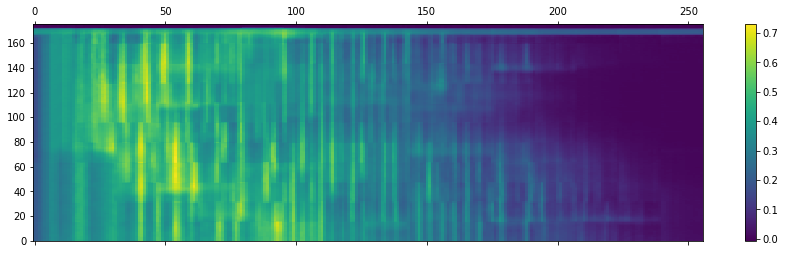

In [86]:
fig, ax = plt.subplots(ncols=1, figsize=(15,4))
cax = ax.matshow(predicted_mel, aspect='auto', origin='lower')
fig.colorbar(cax)

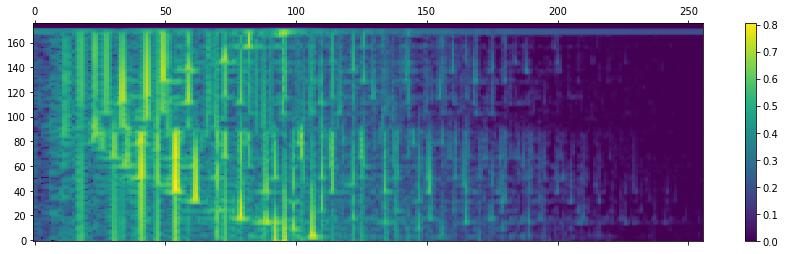

In [87]:
fig, ax = plt.subplots(ncols=1, figsize=(15,4))
cax = ax.matshow(test_good_sample[audio_index].numpy().reshape((176, 256)), aspect='auto', origin='lower')
fig.colorbar(cax)